In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
input_text = df.loc[2]['v2']

In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df.target = encoder.fit_transform(df.target)

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

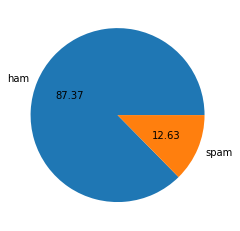

In [20]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['num_character'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_word'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_character,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_character','num_word', 'num_sentences']].describe()

,num_character,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
df[df.target==0][['num_character','num_word', 'num_sentences']].describe()

,num_character,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df.target==1][['num_character','num_word', 'num_sentences']].describe()

,num_character,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

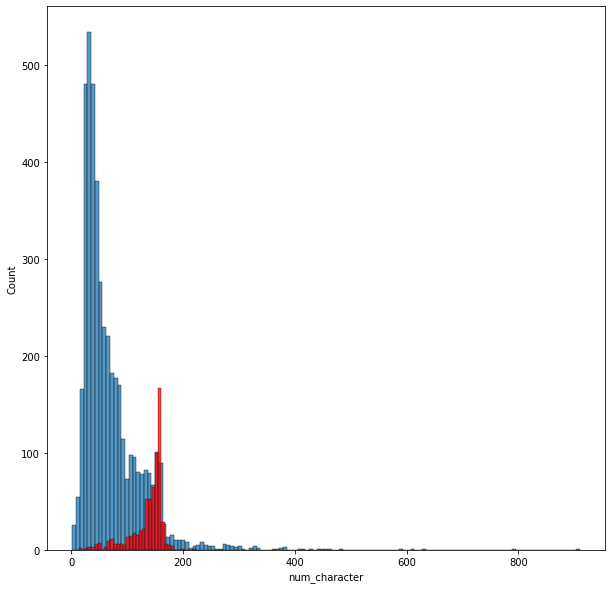

In [33]:
plt.figure(figsize=(10,10))
sns.histplot(df[df.target==0]['num_character'])
sns.histplot(df[df.target==1]['num_character'], color = 'red')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

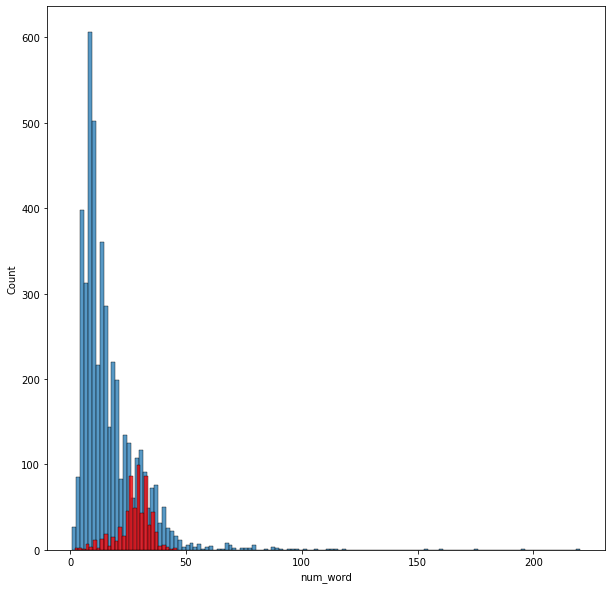

In [34]:
plt.figure(figsize=(10,10))
sns.histplot(df[df.target==0]['num_word'])
sns.histplot(df[df.target==1]['num_word'], color = 'red')

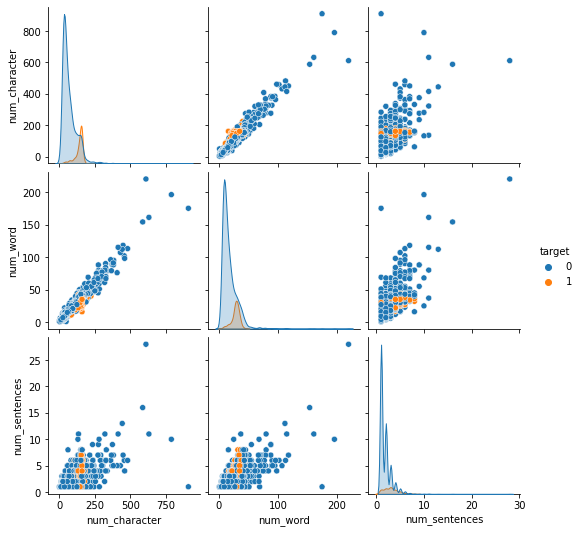

In [35]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

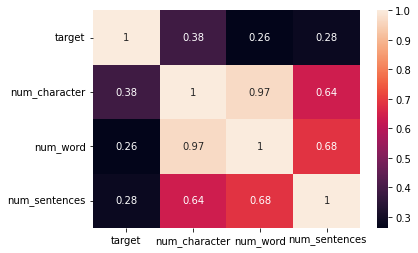

In [36]:
sns.heatmap(df.corr(), annot= True)

In [37]:

nltk.download('stopwords')
  
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:
def transform_text(text):
  text  = text.lower()
  text = nltk.word_tokenize(text)
  y =[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [41]:
transform_text("I love the class lectures on NLP . How about you?")

'love class lectur nlp'

In [42]:
transform_text(df.text[0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [43]:
df['transform_text']= df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_character,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].astype(str).str.cat(sep=' '))


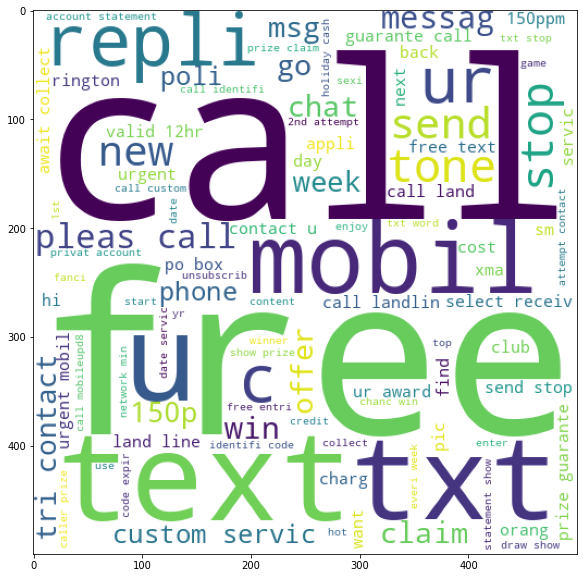

In [47]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].astype(str).str.cat(sep=' '))


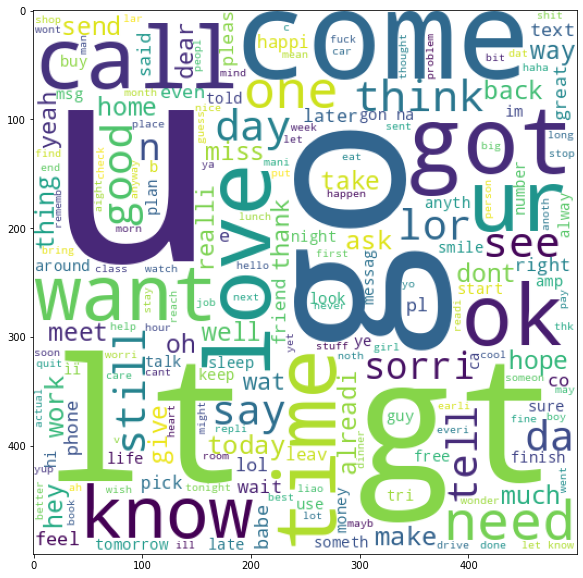

In [49]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_character,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
  msg_str = ' '.join(msg) # concatenate list elements into a string with space separator
  for word in msg_str.split():
    spam_corpus.append(word)


In [52]:
len(spam_corpus)

47033

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


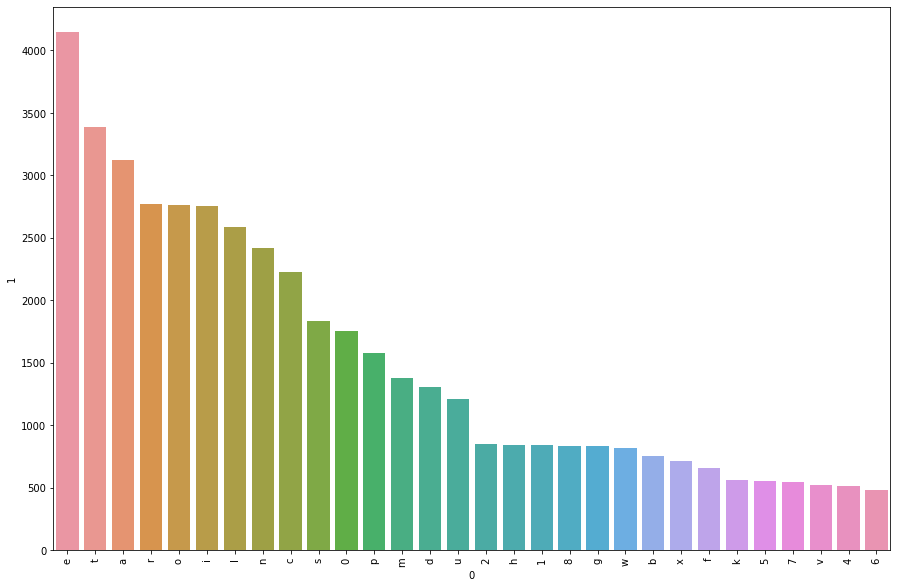

In [53]:
plt.figure(figsize=(15,10))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]);
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
  msg_str = ' '.join(msg) # concatenate list elements into a string with space separator
  for word in msg_str.split():
    ham_corpus.append(word)


In [55]:
len(ham_corpus)

146085

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


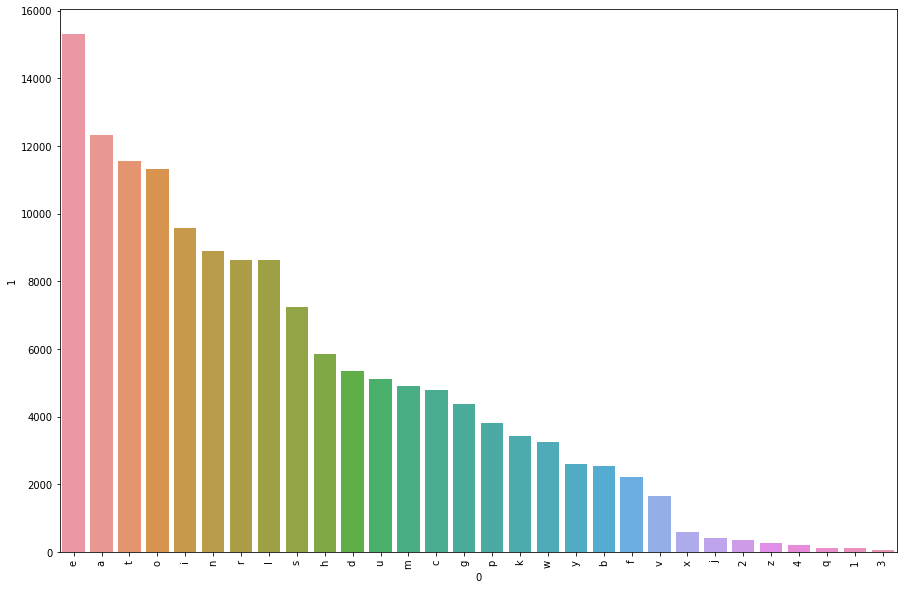

In [56]:
plt.figure(figsize=(15,10))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]);
plt.xticks(rotation='vertical')
plt.show()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()


In [58]:
X= tfidf.fit_transform(df['transform_text']).toarray()

In [59]:
X.shape

(5169, 6708)

In [60]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
y = df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [98]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[774 111]
 [ 22 127]]
0.5336134453781513


In [68]:
mnb.fit(X_train, y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8713733075435203
[[774 111]
 [ 22 127]]
0.5336134453781513


In [69]:
bnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8713733075435203
[[774 111]
 [ 22 127]]
0.5336134453781513


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [72]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.975609756097561)

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.975609756097561
For  KN
Accuracy -  0.8887814313346228
Precision -  1.0
For  NB
Accuracy -  0.9458413926499033
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8785046728971962
For  LR
Accuracy -  0.9564796905222437
Precision -  0.956140350877193
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9752066115702479
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8992805755395683
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9838709677419355
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.972972972972973
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9765625


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.888781,1.000000
2,NB,0.945841,1.000000
5,RF,0.970986,1.000000
8,ETC,0.971954,0.983871
10,xgb,0.973888,0.976562
0,SVC,0.969052,0.975610
6,AdaBoost,0.967118,0.975207
9,GBDT,0.957447,0.972973
4,LR,0.956480,0.956140
7,BgC,0.963250,0.899281


In [79]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(etc, open('model.pkl', 'wb'))

In [80]:
input_text

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [81]:
input = transform_text(input_text)

In [82]:
input

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [83]:
vector_input = tfidf.transform([input]).toarray()

In [84]:
vector_input

array([[0., 0., 0., ..., 0., 0., 0.]])

In [85]:
svc.predict(vector_input)

array([1])

In [89]:
input= "hello , i am elonmusk. You won prize $5M"

In [90]:
input

'hello , i am elonmusk. You won prize $5M'

In [91]:
vector_input = tfidf.transform([input]).toarray()

In [94]:
result = etc.predict(vector_input)

In [95]:
if result==1:
  print(f"{input} is Spam Message")
else:
  print(f"{input} is Not Spam Message")

hello , i am elonmusk. You won prize $5M is Spam Message


## Building RNN_LSTM model


In [110]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, pad_sequences
from keras.models import Model


In [99]:
X = df['transform_text']
y = df['target'].values.reshape(-1,1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,   stratify=y,  random_state=0)

In [101]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

In [102]:
sequences_matrix.shape

(4135, 150)

In [103]:


def RNN_LSTM():
  inputs = Input(name='inputs', shape=[max_len])
  layer = Embedding(max_words, 50, input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256, name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1, name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs, outputs=layer)
  return model


In [106]:
model = RNN_LSTM()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [107]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics =['accuracy'])

In [109]:
# training stage
model.fit(sequences_matrix , y_train, batch_size=128, epochs=20,
          validation_split=0.2)

Epoch 1/20
26/26 [==============================] - 8s 284ms/step - loss: 0.0715 - accuracy: 0.9810 - val_loss: 0.0763 - val_accuracy: 0.9794
Epoch 2/20
26/26 [==============================] - 8s 325ms/step - loss: 0.0347 - accuracy: 0.9906 - val_loss: 0.0733 - val_accuracy: 0.9807
Epoch 3/20
26/26 [==============================] - 7s 273ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0823 - val_accuracy: 0.9807
Epoch 4/20
26/26 [==============================] - 8s 316ms/step - loss: 0.0194 - accuracy: 0.9955 - val_loss: 0.0876 - val_accuracy: 0.9843
Epoch 5/20
26/26 [==============================] - 10s 403ms/step - loss: 0.0117 - accuracy: 0.9973 - val_loss: 0.0972 - val_accuracy: 0.9758
Epoch 6/20
26/26 [==============================] - 11s 441ms/step - loss: 0.0102 - accuracy: 0.9979 - val_loss: 0.0956 - val_accuracy: 0.9807
Epoch 7/20
26/26 [==============================] - 9s 326ms/step - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.1024 - val_accuracy: 0.9794
Epoc

In [116]:
spam_test = ['hi, this is free free free free wanna know about it, ']
ham_test = ['hi this mr jack']

In [117]:
# txt_s = tok.texts_to_sequences([df.loc[2]['text']])
txt_s = tok.texts_to_sequences(spam_test)
# txt_h = tok.texts_to_sequences([df.loc[1]['text']])
txt_h = tok.texts_to_sequences(ham_test)
tm_s = pad_sequences(txt_s, maxlen= max_len)
tm_h = pad_sequences(txt_h, maxlen= max_len)

In [119]:
tm_s

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        44, 15, 15, 15, 15, 11]], dtype=int32)

In [120]:
predict_s = model.predict(tm_s)
predict_h = model.predict(tm_h)
predict_s[0][0], predict_h[0][0]

1/1 [==============================] - 0s 33ms/step


(0.33093804, 0.04094118)

In [121]:

from tensorflow.keras.models import load_model
model.save("/content/saved model/lstm_model.h5")

In [122]:
saved_model = load_model('/content/saved model/lstm_model.h5')

In [123]:
import pickle
pickle.dump(tok, open('tokenizer.pkl', 'wb'))